# `Hotel Reservation Prediction`

`Aan Nurliyanah`

Context :


The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

In this project we will predict is the customer going to honor the reservation or cancel it using Machine Learning tools. 

## Import Library

In [ ]:
!pip install feature_engine
# untuk perhitungan data, pengolahan data, dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# untuk spliting data
from sklearn.model_selection import train_test_split

# untuk preprocessing data, feature selection, scaler, encoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, OrdinalEncoder 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# untuk menampilkan model pipeline
from sklearn import set_config
set_config(display='diagram')


# untuk pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# untuk modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# untuk evaluasi model 
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix,plot_confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# untuk import model 
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.2 MB/s eta 0:00:00


## Data Loading and Overview

The source of the dataset is from Kaggle :

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Download the data using API from kaggle 

In [ ]:
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 113MB/s]


In [ ]:
!unzip -q /content/hotel-reservations-classification-dataset.zip -d dataset

Loading data using read csv

In [ ]:
data = pd.read_csv('/content/dataset/Hotel Reservations.csv',na_values=['?',' ','99999','N/A'],skipinitialspace=True)

In [ ]:
data.shape

(36275, 19)

The data contains 36275 row and 19 columns, we use pd set option Display maximum columns

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


Take a look the information of the data, the type etc

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Check missing value 

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Checking data duplicated 

In [ ]:
data[data.duplicated()].shape

(0, 19)

General overview : 

- There is no missing value 
- There is no data duplicated 
- We will remove Booking_ID in the next section because it actually represent by index, the booking ID is just unique value. 
- Our target is booking_status
- We will change the target columns value, into numeric instead of object. 


## Data Cleaning

Make a copy of the original data, to keep the data save. 

In [ ]:
data_clean = data.copy()

Droping Booking_ID

In [ ]:
data_clean.drop(['Booking_ID'], axis=1, inplace=True)

In [ ]:
data_clean.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

Replace target value

In [ ]:
data_clean.booking_status.replace({'Not_Canceled': 0, 'Canceled': 1}, inplace=True)
data_clean.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [ ]:
data_clean.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Check the central tendency of the numerical datas to see if there is an anomaly or not. 

In [ ]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Divide the data into numerical and categorical 

In [ ]:
num = data_clean[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
                  'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']].columns.tolist()
cat = data_clean[['required_car_parking_space','arrival_year','arrival_month','arrival_date','repeated_guest','booking_status',
                  'type_of_meal_plan','room_type_reserved','market_segment_type']].columns.tolist()

Checking the central tendency of numerical data


In [ ]:
data_clean[num].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
no_of_previous_cancellations,36275.0,0.023349,0.368331,0.0,0.0,0.00,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.153411,1.754171,0.0,0.0,0.00,0.0,58.0
avg_price_per_room,36275.0,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0
no_of_special_requests,36275.0,0.619655,0.786236,0.0,0.0,0.00,1.0,5.0


Checking the value of the categorical data

In [ ]:
for i in cat:
    print(i)
    print(data_clean[i].value_counts())
    print('-'*30)

required_car_parking_space
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
------------------------------
arrival_year
2018    29761
2017     6514
Name: arrival_year, dtype: int64
------------------------------
arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
------------------------------
arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64
------------------------------
repeated_guest
0    35345
1      930
Name: repeated_guest, dtype: int64
------------------------------
booking_status
0    24390
1    11885

General overview:

- There are numerical and categorical data 
- From the central tendency there some anomaly from the several columns, because the Q3 and the max have a high range. Maybe there are some outlier in there, we will check further in the next section. 

## Exploratory Data Analysis (EDA)

This part is contain of the data exploration and simple visualization

Visualization of the target : booking_status

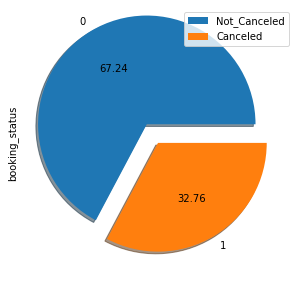

In [ ]:
plt.figure(figsize = (8,5),facecolor='white')
data_clean['booking_status'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['Not_Canceled','Canceled'])
plt.show()

As we see that the data have mild imbalance, but this time we will ignore it and don't do the handling imbalance. 

Visualization of required_car_parking_space againts booking_status

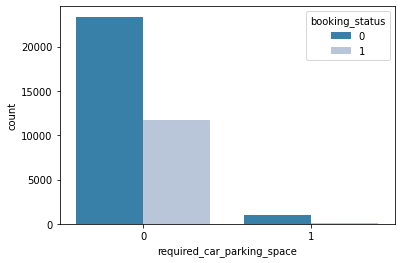

In [ ]:
sns.countplot(data=data_clean,x='required_car_parking_space',hue='booking_status',palette="PuBu_r")

As we see that the one which didn't need the car parking cancelled the reservation in a huge number, otherwise the customer which need the car parking space didn't cancelled. From that we can say that there is no problem with the hotel service to provide the car parking space. 

Visualization of repeated_guest againts booking_status. 

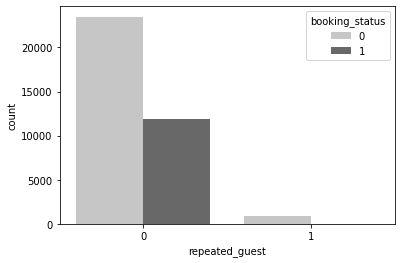

In [ ]:
sns.countplot(data=data_clean,x='repeated_guest',hue='booking_status',palette="Greys")

The customer which cancelled a lot is the customer which not our repetead guest. That can be our insight why the customer not repeat to stay in our hotel, and prefer to cancelled after booking. 

Visualization of arrival year againts booking_status

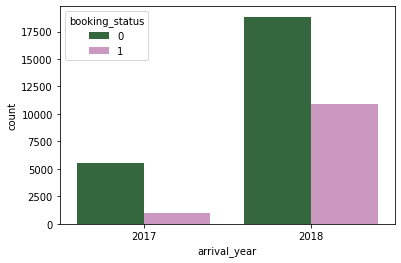

In [ ]:
sns.countplot(data=data_clean,x='arrival_year',hue='booking_status',palette="cubehelix")

in 2018 the number of cancelation is higher than 2017. 

Visualization of market segment type againts booking status.

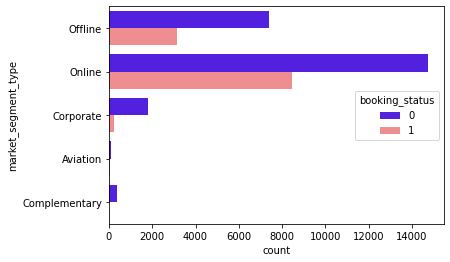

In [ ]:
sns.countplot(data=data_clean,y='market_segment_type',hue='booking_status',palette="gnuplot2")

The online type has a higher number of cancellation, now everything is simple through online services, its make easier to buy or booking something and easier to cancelled to because the customer don't need an effort to do that. 

Visualization arrival_month againts booking status

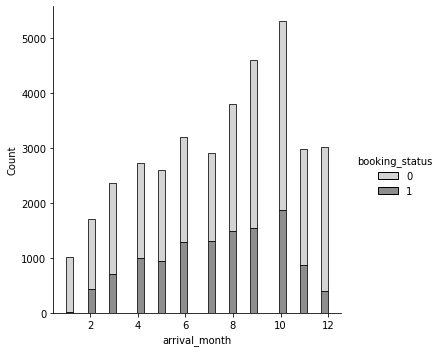

In [ ]:
sns.displot(data=data_clean, x='arrival_month', hue='booking_status',multiple="stack",palette='Greys' )

The peak of the booking is in October, but the cancellation also has the high number. 

Visualization of average price per room againts booking status

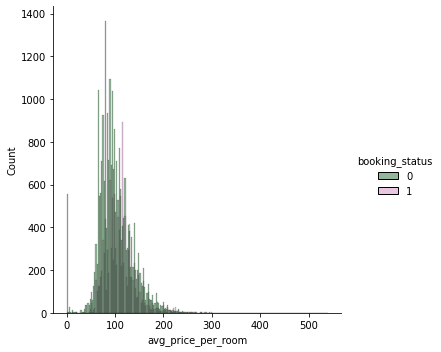

In [ ]:
sns.displot(data=data_clean, x='avg_price_per_room', hue='booking_status',palette='cubehelix')

The most price that customer choose is between 100-200 euros, and the peak of the cancelatioon is on 100 euros. This came up with the conclusion that our customer mostly booked in that range of price. Or we can say the middle class of customer.  

## Split dataset

In [ ]:
#data untuk model inference
data_inf = data_clean.sample(15,random_state=15)
data_inf

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
24340,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,0
11542,2,0,0,3,Meal Plan 1,0,Room_Type 1,22,2018,3,3,Online,0,0,0,94.33,2,0
24626,2,0,1,2,Meal Plan 1,0,Room_Type 1,190,2018,11,14,Online,0,0,0,81.90,1,0
26259,2,0,0,1,Meal Plan 1,0,Room_Type 1,2,2018,10,25,Online,0,0,0,140.00,0,0
23408,2,0,4,6,Meal Plan 1,0,Room_Type 1,33,2018,3,5,Online,0,0,0,64.46,1,0
27377,2,0,0,4,Meal Plan 1,0,Room_Type 4,274,2018,10,19,Online,0,0,0,99.45,1,1
8042,2,0,1,2,Meal Plan 1,0,Room_Type 1,39,2017,10,23,Online,0,0,0,74.88,1,0
16701,2,0,1,2,Meal Plan 1,0,Room_Type 1,191,2018,6,3,Offline,0,0,0,132.00,0,1
22273,2,0,0,4,Meal Plan 1,0,Room_Type 1,12,2017,11,10,Online,0,0,0,95.00,0,0
5613,2,0,0,1,Not Selected,0,Room_Type 1,65,2018,10,28,Online,0,0,0,80.10,2,0


In [ ]:
# Menghapus Inference-Set dari Dataset

data_clean = data_clean.drop(data_inf.index)
data_clean.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0


In [ ]:
# Reset Index 

data_clean.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,0
1,2,0,0,3,Meal Plan 1,0,Room_Type 1,22,2018,3,3,Online,0,0,0,94.33,2,0
2,2,0,1,2,Meal Plan 1,0,Room_Type 1,190,2018,11,14,Online,0,0,0,81.90,1,0
3,2,0,0,1,Meal Plan 1,0,Room_Type 1,2,2018,10,25,Online,0,0,0,140.00,0,0
4,2,0,4,6,Meal Plan 1,0,Room_Type 1,33,2018,3,5,Online,0,0,0,64.46,1,0
5,2,0,0,4,Meal Plan 1,0,Room_Type 4,274,2018,10,19,Online,0,0,0,99.45,1,1
6,2,0,1,2,Meal Plan 1,0,Room_Type 1,39,2017,10,23,Online,0,0,0,74.88,1,0
7,2,0,1,2,Meal Plan 1,0,Room_Type 1,191,2018,6,3,Offline,0,0,0,132.00,0,1
8,2,0,0,4,Meal Plan 1,0,Room_Type 1,12,2017,11,10,Online,0,0,0,95.00,0,0
9,2,0,0,1,Not Selected,0,Room_Type 1,65,2018,10,28,Online,0,0,0,80.10,2,0


Split data into train and test 

In [ ]:
fitur = data_clean.drop('booking_status', axis=1)
target = data_clean['booking_status']

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(fitur,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target,random_state=0
                                                               )



In [ ]:
data_eda = pd.concat([x_train, y_train], axis=1)
data_eda.shape

(29008, 18)

In [ ]:
X_train_eda = x_train.copy()

In [ ]:
nums = data_eda[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
                  'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']].columns.tolist()
cats = data_eda[['required_car_parking_space','arrival_year','arrival_month','arrival_date','repeated_guest','booking_status',
                  'type_of_meal_plan','room_type_reserved','market_segment_type']].columns.tolist()

### Numerical feature

Lets see the skewness of numerical data

In [ ]:
skew = data_eda[nums].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
no_of_adults,-0.329193
no_of_children,4.649885
no_of_weekend_nights,0.698811
no_of_week_nights,1.506337
lead_time,1.285420
no_of_previous_cancellations,24.441474
no_of_previous_bookings_not_canceled,18.667149
avg_price_per_room,0.650658
no_of_special_requests,1.142376


In [ ]:
skew.loc[lambda x : (x < -0.5) | (x > 0.5)]

no_of_children                           4.649885
no_of_weekend_nights                     0.698811
no_of_week_nights                        1.506337
lead_time                                1.285420
no_of_previous_cancellations            24.441474
no_of_previous_bookings_not_canceled    18.667149
avg_price_per_room                       0.650658
no_of_special_requests                   1.142376
dtype: float64

Most of the numerical data has abnormal distribution , they have a high skewness more than 1. Lets take a look through visualization. 

In [ ]:
numerical = data_eda[nums]

In [ ]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()
     

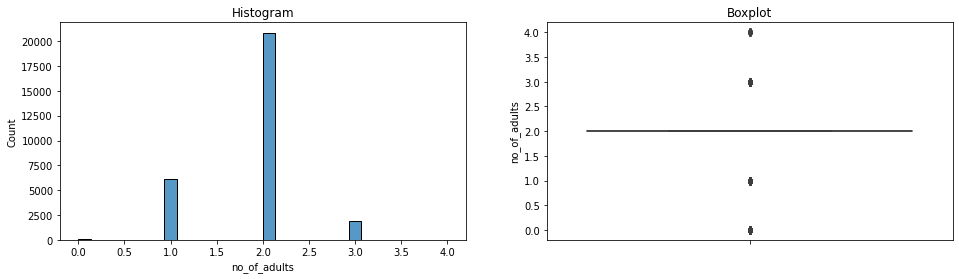

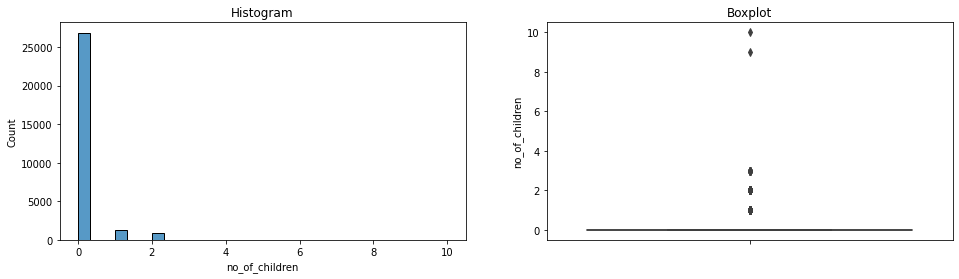

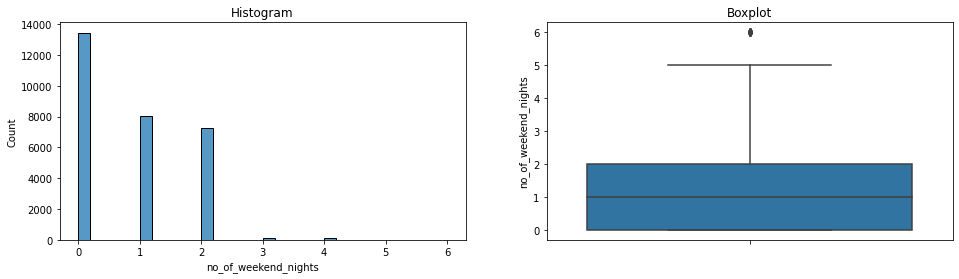

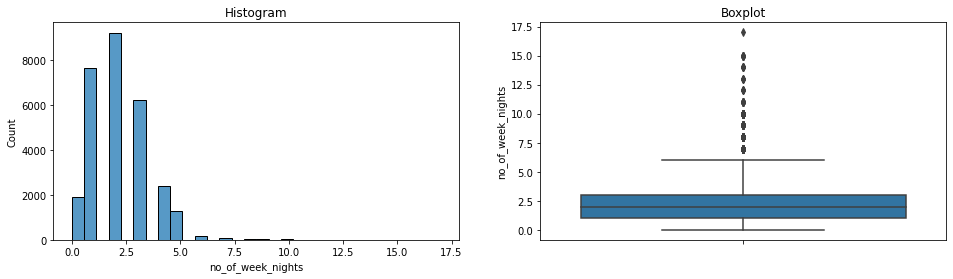

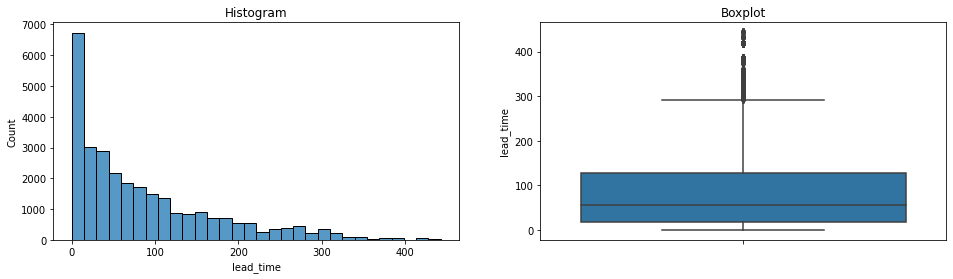

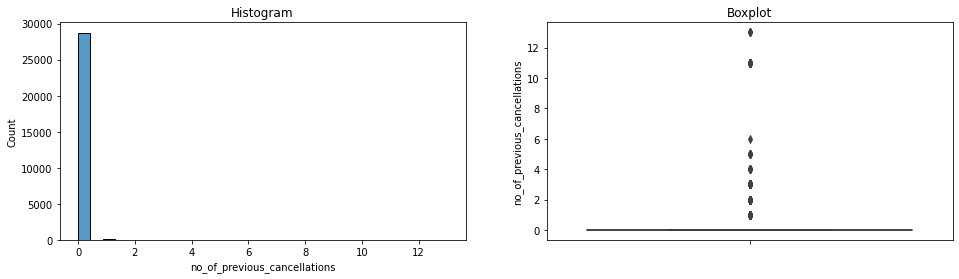

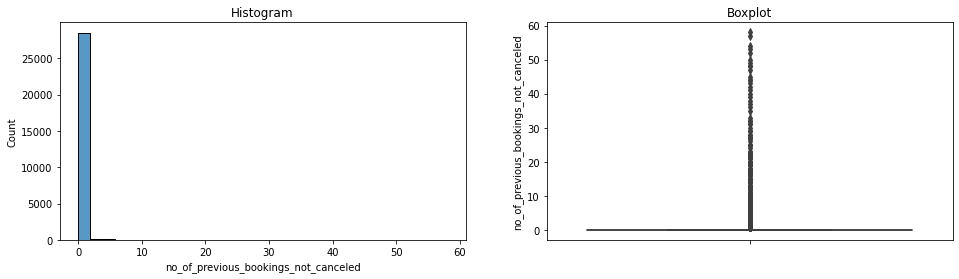

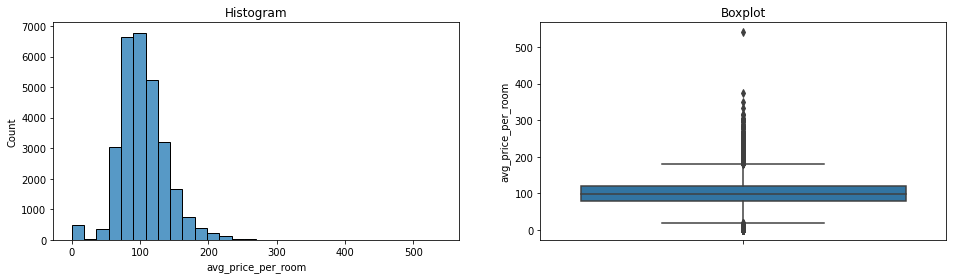

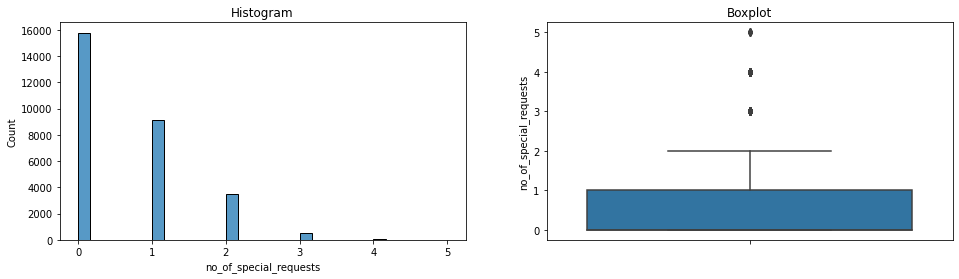

In [ ]:
diagnostic_plots(numerical, 'no_of_adults')
diagnostic_plots(numerical, 'no_of_children')
diagnostic_plots(numerical, 'no_of_weekend_nights')
diagnostic_plots(numerical, 'no_of_week_nights')
diagnostic_plots(numerical, 'lead_time')
diagnostic_plots(numerical, 'no_of_previous_cancellations')
diagnostic_plots(numerical, 'no_of_previous_bookings_not_canceled')
diagnostic_plots(numerical, 'avg_price_per_room')
diagnostic_plots(numerical, 'no_of_special_requests')


In [ ]:
for k in numerical:
  Q3 = numerical[k].quantile(.75)
  Q1 = numerical[k].quantile(.25)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = numerical[(numerical[k] > upper) | (numerical[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/numerical.shape[0] * 100, '%')
  print('='*70)

no_of_adults
count of outlier:  8171
percent k of outlier:  28.168091560948703 %
no_of_children
count of outlier:  2157
percent k of outlier:  7.43587975730833 %
no_of_weekend_nights
count of outlier:  0
percent k of outlier:  0.0 %
no_of_week_nights
count of outlier:  83
percent k of outlier:  0.2861279646993933 %
lead_time
count of outlier:  0
percent k of outlier:  0.0 %
no_of_previous_cancellations
count of outlier:  273
percent k of outlier:  0.9411196911196912 %
no_of_previous_bookings_not_canceled
count of outlier:  662
percent k of outlier:  2.2821290678433535 %
avg_price_per_room
count of outlier:  66
percent k of outlier:  0.2275234418091561 %
no_of_special_requests
count of outlier:  7
percent k of outlier:  0.02413127413127413 %


There are so much outlier in every columns, but in next section we will handling outlier in lead average price per room only. 
The other columns is represent the real data so we ignore the outlier. For example the number of the adult or childreen. We keep the data real. 


#### Capping Outlier

Capping outlier using IQR method because the distribution is skew. 

In [ ]:
# capping outlier 
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, 
variables=['avg_price_per_room'])

X_train_eda = wins.fit_transform(X_train_eda)
X_train_eda.avg_price_per_room.describe()

count    29008.000000
mean       103.341133
std         34.713215
min          0.000000
25%         80.300000
50%         99.450000
75%        120.600000
max        241.500000
Name: avg_price_per_room, dtype: float64

In [ ]:
X_train_eda[nums].isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
lead_time                               0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

#### Scaling

In [ ]:
scaler = MinMaxScaler()

X_train_eda[nums] = scaler.fit_transform(X_train_eda[nums])
X_train_eda

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
27405,0.25,0.0,0.000000,0.176471,Meal Plan 1,0,Room_Type 1,0.537246,2018,10,13,Offline,0,0.0,0.0,0.331263,0.0
13403,0.50,0.0,0.166667,0.058824,Meal Plan 2,0,Room_Type 1,0.679458,2018,7,30,Offline,0,0.0,0.0,0.476190,0.2
30628,0.50,0.0,0.166667,0.000000,Meal Plan 1,0,Room_Type 1,0.002257,2018,3,28,Online,0,0.0,0.0,0.418219,0.0
10222,0.50,0.0,0.000000,0.058824,Meal Plan 1,1,Room_Type 1,0.024831,2017,11,3,Online,0,0.0,0.0,0.397516,0.2
22600,0.25,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 1,0.370203,2017,10,2,Offline,0,0.0,0.0,0.414079,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16683,0.50,0.1,0.333333,0.117647,Meal Plan 1,0,Room_Type 1,0.160271,2018,6,17,Offline,0,0.0,0.0,0.385424,0.2
6161,0.50,0.0,0.166667,0.117647,Meal Plan 1,0,Room_Type 4,0.212190,2018,4,15,Online,0,0.0,0.0,0.373002,0.0
16275,0.25,0.0,0.000000,0.058824,Meal Plan 1,0,Room_Type 1,0.002257,2018,3,1,Online,0,0.0,0.0,0.397516,0.2
10557,0.25,0.0,0.000000,0.058824,Meal Plan 1,0,Room_Type 1,0.000000,2017,8,11,Online,0,0.0,0.0,0.472050,0.2


#### Feature Selection using Annova

ANOVA is a useful method for feature selection because it is a non-parametric, versatile, efficient, and informative method that can handle both continuous and categorical variables.It can help to reduce the dimensionality of the data, which can improve the performance of the model and reduce overfitting.

In [ ]:
numericalss = X_train_eda[nums]

In [ ]:
numericalss

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
27405,0.25,0.0,0.000000,0.176471,0.537246,0.0,0.0,0.331263,0.0
13403,0.50,0.0,0.166667,0.058824,0.679458,0.0,0.0,0.476190,0.2
30628,0.50,0.0,0.166667,0.000000,0.002257,0.0,0.0,0.418219,0.0
10222,0.50,0.0,0.000000,0.058824,0.024831,0.0,0.0,0.397516,0.2
22600,0.25,0.0,0.000000,0.117647,0.370203,0.0,0.0,0.414079,0.0
...,...,...,...,...,...,...,...,...,...
16683,0.50,0.1,0.333333,0.117647,0.160271,0.0,0.0,0.385424,0.2
6161,0.50,0.0,0.166667,0.117647,0.212190,0.0,0.0,0.373002,0.0
16275,0.25,0.0,0.000000,0.058824,0.002257,0.0,0.0,0.397516,0.2
10557,0.25,0.0,0.000000,0.058824,0.000000,0.0,0.0,0.472050,0.2


In [ ]:
targets = pd.DataFrame(y_train)

In [ ]:
f_test = SelectKBest(score_func=f_classif, k=9)
fit = f_test.fit(numericalss, targets)
fit.scores_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 244.20852281,   34.57593223,  104.3196091 ,  245.32139084,
       6963.32369924,   30.36733447,  109.29412854,  612.3054776 ,
       1978.93435404])

In [ ]:
np.round_(fit.scores_)

array([ 244.,   35.,  104.,  245., 6963.,   30.,  109.,  612., 1979.])

In [ ]:
result = pd.Series(fit.scores_)
result.index = numericalss.columns
result.sort_values(ascending=False)

lead_time                               6963.323699
no_of_special_requests                  1978.934354
avg_price_per_room                       612.305478
no_of_week_nights                        245.321391
no_of_adults                             244.208523
no_of_previous_bookings_not_canceled     109.294129
no_of_weekend_nights                     104.319609
no_of_children                            34.575932
no_of_previous_cancellations              30.367334
dtype: float64

We use the threshold >100 to choose the features, so the selected fatures are : lead_time,no_of_special_requests,avg_price_per_room,no_of_week_nights,no_of_adults,no_of_weekend_nights,no_of_previous_bookings_not_canceled.

### Categorical feature

In [ ]:
data_eda[cats].columns

Index(['required_car_parking_space', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest', 'booking_status', 'type_of_meal_plan',
       'room_type_reserved', 'market_segment_type'],
      dtype='object')

#### Ordinal Encoder

We use Ordinal encoder to all categoric columns exclude market_type

In [ ]:
for i in cats:
    print(i)
    print(data_eda[i].value_counts())
    print('-'*30)

required_car_parking_space
0    28100
1      908
Name: required_car_parking_space, dtype: int64
------------------------------
arrival_year
2018    23813
2017     5195
Name: arrival_year, dtype: int64
------------------------------
arrival_month
10    4261
9     3670
8     3082
6     2514
12    2428
11    2381
7     2346
4     2167
5     2100
3     1855
2     1382
1      822
Name: arrival_month, dtype: int64
------------------------------
arrival_date
17    1093
13    1090
4     1072
19    1066
16    1048
2     1044
20    1028
6     1018
15    1015
18     988
14     979
8      972
30     965
29     953
12     951
26     940
21     937
28     917
1      907
5      905
11     904
25     903
24     897
9      894
7      894
10     868
3      861
27     840
22     819
23     773
31     467
Name: arrival_date, dtype: int64
------------------------------
repeated_guest
0    28249
1      759
Name: repeated_guest, dtype: int64
------------------------------
booking_status
0    19503
1     9505

In [ ]:
required_car_parking_space =[0,1]
arrival_year=[2017,2018]
arrival_month =[1,2,3,4,5,6,7,8,9,10,11,12]
arrival_date =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
repeated_guest =[0,1]
type_of_meal_plan = ['Meal Plan 1','Meal Plan 2','Meal Plan 3','Not Selected']
room_type_reserved = ['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7']

ord_enc = OrdinalEncoder(categories=[required_car_parking_space, arrival_year, arrival_month,arrival_date, repeated_guest, type_of_meal_plan,room_type_reserved])
cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_eda[['required_car_parking_space', 'arrival_year', 'arrival_month',
                                                              'arrival_date', 'repeated_guest', 'type_of_meal_plan','room_type_reserved']]))

cat_ord.columns = ['required_car_parking_space2', 'arrival_year2', 'arrival_month2','arrival_date2', 'repeated_guest2', 'type_of_meal_plan2','room_type_reserved2']
     

In [ ]:
cat_ord

,required_car_parking_space2,arrival_year2,arrival_month2,arrival_date2,repeated_guest2,type_of_meal_plan2,room_type_reserved2
0,0.0,1.0,9.0,12.0,0.0,0.0,0.0
1,0.0,1.0,6.0,29.0,0.0,1.0,0.0
2,0.0,1.0,2.0,27.0,0.0,0.0,0.0
3,1.0,0.0,10.0,2.0,0.0,0.0,0.0
4,0.0,0.0,9.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29003,0.0,1.0,5.0,16.0,0.0,0.0,0.0
29004,0.0,1.0,3.0,14.0,0.0,0.0,3.0
29005,0.0,1.0,2.0,0.0,0.0,0.0,0.0
29006,0.0,0.0,7.0,10.0,0.0,0.0,0.0


#### One Hot Encoder

We use OHE to market_segment_type only. 

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_eda[['market_segment_type']]))
cat_ohe.columns = ohe_enc.get_feature_names(['market_segment_type'])

review = pd.concat([X_train_eda[['market_segment_type']].reset_index(drop=True), cat_ohe], axis=1)
review.head(5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,market_segment_type,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,Offline,0.0,0.0,0.0,1.0,0.0
1,Offline,0.0,0.0,0.0,1.0,0.0
2,Online,0.0,0.0,0.0,0.0,1.0
3,Online,0.0,0.0,0.0,0.0,1.0
4,Offline,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_eda_encoder = pd.concat([X_train_eda.reset_index(drop=True), cat_ohe, cat_ord], axis=1)
data_eda_encoder

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,required_car_parking_space2,arrival_year2,arrival_month2,arrival_date2,repeated_guest2,type_of_meal_plan2,room_type_reserved2
0,0.25,0.0,0.000000,0.176471,Meal Plan 1,0,Room_Type 1,0.537246,2018,10,13,Offline,0,0.0,0.0,0.331263,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,12.0,0.0,0.0,0.0
1,0.50,0.0,0.166667,0.058824,Meal Plan 2,0,Room_Type 1,0.679458,2018,7,30,Offline,0,0.0,0.0,0.476190,0.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,29.0,0.0,1.0,0.0
2,0.50,0.0,0.166667,0.000000,Meal Plan 1,0,Room_Type 1,0.002257,2018,3,28,Online,0,0.0,0.0,0.418219,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,27.0,0.0,0.0,0.0
3,0.50,0.0,0.000000,0.058824,Meal Plan 1,1,Room_Type 1,0.024831,2017,11,3,Online,0,0.0,0.0,0.397516,0.2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,2.0,0.0,0.0,0.0
4,0.25,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 1,0.370203,2017,10,2,Offline,0,0.0,0.0,0.414079,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29003,0.50,0.1,0.333333,0.117647,Meal Plan 1,0,Room_Type 1,0.160271,2018,6,17,Offline,0,0.0,0.0,0.385424,0.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,16.0,0.0,0.0,0.0
29004,0.50,0.0,0.166667,0.117647,Meal Plan 1,0,Room_Type 4,0.212190,2018,4,15,Online,0,0.0,0.0,0.373002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,14.0,0.0,0.0,3.0
29005,0.25,0.0,0.000000,0.058824,Meal Plan 1,0,Room_Type 1,0.002257,2018,3,1,Online,0,0.0,0.0,0.397516,0.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
29006,0.25,0.0,0.000000,0.058824,Meal Plan 1,0,Room_Type 1,0.000000,2017,8,11,Online,0,0.0,0.0,0.472050,0.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,10.0,0.0,0.0,0.0


In [ ]:
category = pd.concat([cat_ohe, cat_ord], axis=1)

In [ ]:
category

,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,required_car_parking_space2,arrival_year2,arrival_month2,arrival_date2,repeated_guest2,type_of_meal_plan2,room_type_reserved2
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,12.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,29.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,27.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29003,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,16.0,0.0,0.0,0.0
29004,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,14.0,0.0,0.0,3.0
29005,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
29006,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,10.0,0.0,0.0,0.0


#### Feature Selection using CHI2

CHI2 is a useful method for feature selection because it is a non-parametric, informative, and efficient method that can handle categorical variables. It can be used to identify features that are dependent on the target variable, it can be used as a filter method or as a wrapper method, and it can be used for text classification and information retrieval among other applications.

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(category, y_train)
fit.scores_

array([3.47491967e-01, 1.57904938e+02, 3.66005503e+02, 2.10258670e+01,
       1.09390293e+02, 2.17371739e+02, 1.68516367e+02, 6.82522476e+00,
       2.38432425e+01, 3.32246264e+02, 4.49149945e+01, 4.37933856e+01])

In [ ]:

np.round_(fit.scores_)

array([  0., 158., 366.,  21., 109., 217., 169.,   7.,  24., 332.,  45.,
        44.])

In [ ]:
chi = pd.Series(fit.scores_)
chi.index = category.columns
chi.sort_values(ascending=False)

market_segment_type_Corporate        366.005503
repeated_guest2                      332.246264
required_car_parking_space2          217.371739
arrival_year2                        168.516367
market_segment_type_Complementary    157.904938
market_segment_type_Online           109.390293
type_of_meal_plan2                    44.914995
room_type_reserved2                   43.793386
arrival_date2                         23.843243
market_segment_type_Offline           21.025867
arrival_month2                         6.825225
market_segment_type_Aviation           0.347492
dtype: float64

Same as numerical, we have threshold >100, so the selected features are : market_segment_type_Corporate,repeated_guest2,required_car_parking_space2,arrival_year2,market_segment_type_Complementary,market_segment_type_Online

## Data Preprocessing

### Pipeline

In [ ]:
num_pipeline = Pipeline([
        ('outlier' , Winsorizer(capping_method='iqr', tail='both', fold=3,variables=['avg_price_per_room'])),
        ('scaler', MinMaxScaler())
    ])

cat_1_pipeline = Pipeline([
        ('ord_enc', OrdinalEncoder(categories=[required_car_parking_space, arrival_year, repeated_guest])) 
    ])

cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False,handle_unknown='ignore'))
        
    ])


In [ ]:

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['avg_price_per_room','lead_time','no_of_special_requests','no_of_week_nights','no_of_adults','no_of_weekend_nights','no_of_previous_bookings_not_canceled']),
        ("cat_ord", cat_1_pipeline, ['required_car_parking_space', 'arrival_year', 'repeated_guest']),
        ("cat_ohe", cat_2_pipeline, ['market_segment_type']),
        ],verbose=True)

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both',
                                                             variables=['avg_price_per_room'])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['avg_price_per_room', 'lead_time',
                                  'no_of_special_requests', 'no_of_week_nights',
                                  'no_of_adults', 'no_of_weekend_nights',
                                  'no_of_previous_bookings_not_canceled']),
                                ('cat_ord',
                                 Pipeline(steps=[('ord_enc',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [2017,
                                                                              2018],
                                                                             [0,
                                                                              1]]))]),
                                 ['required_car_parking_space', 'arrival_year',
                                  'repeated_guest']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['market_segment_type'])],
                  verbose=True)

The selected feature : 

lead_time,no_of_special_requests,avg_price_per_room,no_of_week_nights,no_of_adults,no_of_weekend_nights,no_of_previous_bookings_not_canceled,market_segment_type_Corporate,repeated_guest2,required_car_parking_space2,arrival_year2,market_segment_type_Complementary,market_segment_type_Online

In [ ]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
27405,1,0,0,3,Meal Plan 1,0,Room_Type 1,238,2018,10,13,Offline,0,0,0,80.00,0
13403,2,0,1,1,Meal Plan 2,0,Room_Type 1,301,2018,7,30,Offline,0,0,0,115.00,1
30628,2,0,1,0,Meal Plan 1,0,Room_Type 1,1,2018,3,28,Online,0,0,0,101.00,0
10222,2,0,0,1,Meal Plan 1,1,Room_Type 1,11,2017,11,3,Online,0,0,0,96.00,1
22600,1,0,0,2,Meal Plan 1,0,Room_Type 1,164,2017,10,2,Offline,0,0,0,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16683,2,1,2,2,Meal Plan 1,0,Room_Type 1,71,2018,6,17,Offline,0,0,0,93.08,1
6161,2,0,1,2,Meal Plan 1,0,Room_Type 4,94,2018,4,15,Online,0,0,0,90.08,0
16275,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,1,Online,0,0,0,96.00,1
10557,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,8,11,Online,0,0,0,114.00,1


In [ ]:
X_train = full_pipeline.fit_transform(x_train[['lead_time','no_of_special_requests','avg_price_per_room','no_of_week_nights','no_of_adults','no_of_weekend_nights','no_of_previous_bookings_not_canceled','market_segment_type','repeated_guest','required_car_parking_space','arrival_year']])

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 3) Processing cat_ord, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing cat_ohe, total=   0.0s


In [ ]:
X_train

array([[0.33126294, 0.53724605, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.47619048, 0.67945824, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.41821946, 0.00225734, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.39751553, 0.00225734, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.47204969, 0.        , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.44306418, 0.94356659, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_test = full_pipeline.transform(x_test[['lead_time','no_of_special_requests','avg_price_per_room','no_of_week_nights','no_of_adults','no_of_weekend_nights','no_of_previous_bookings_not_canceled','market_segment_type','repeated_guest','required_car_parking_space','arrival_year']])

In [ ]:
X_test

array([[0.47619048, 0.72234763, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.61697723, 0.02031603, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.66803313, 0.00677201, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45134576, 0.16704289, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.09706546, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36438923, 0.00451467, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Model Building

We will use 5 model and we will compare which is the best model. 

In [ ]:
logreg = LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)
svm = SVC(random_state=0)

### Logistic regression

Logistic Regression is a simple and interpretable algorithm that is useful for binary classification problems. It is based on the logistic function and is sensitive to the linearity assumption, which means that it assumes that the relationship between the features and the target variable is linear. Logistic Regression is also easy to interpret, as it provides coefficients for each feature that indicate the strength of the relationship between the feature and the target variable.

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     19503
           1       0.74      0.62      0.68      9505

    accuracy                           0.81     29008
   macro avg       0.79      0.76      0.77     29008
weighted avg       0.80      0.81      0.80     29008

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4876
           1       0.74      0.61      0.67      2376

    accuracy                           0.80      7252
   macro avg       0.78      0.75      0.77      7252
weighted avg       0.80      0.80      0.80      7252

Confusion Matrix      : 


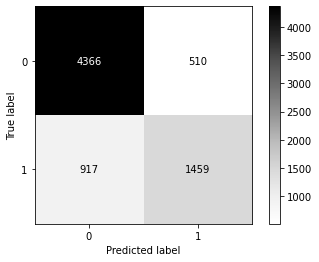

In [ ]:
logreg.fit(X_train, y_train)

lr_train = logreg.predict(X_train)
lr_test = logreg.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Greys'))

### Decission Tree 

Decision Tree is a simple and interpretable algorithm that is useful for both classification and regression problems. It is based on a tree-like structure and makes decisions by recursively splitting the data based on the features. Decision Trees are easy to interpret, as they provide a clear path of decisions that lead to the final prediction. However, they are prone to overfitting and can be computationally expensive.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19503
           1       1.00      0.98      0.99      9505

    accuracy                           0.99     29008
   macro avg       0.99      0.99      0.99     29008
weighted avg       0.99      0.99      0.99     29008

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4876
           1       0.79      0.79      0.79      2376

    accuracy                           0.86      7252
   macro avg       0.84      0.84      0.84      7252
weighted avg       0.86      0.86      0.86      7252

Confusion Matrix      : 


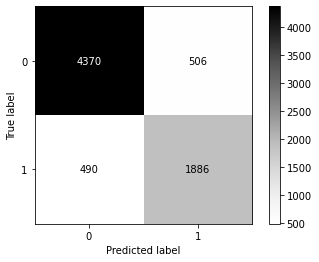

In [ ]:
dtc.fit(X_train, y_train)

lr_train = dtc.predict(X_train)
lr_test = dtc.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, cmap='Greys'))

### Random Forest 

Random Forest is an extension of Decision Trees that is useful for both classification and regression problems. It is an ensemble of Decision Trees, where each tree is trained on a random subset of the data. Random Forests are more accurate and less prone to overfitting than single Decision Trees. They also provide an estimate of feature importance.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19503
           1       0.99      0.98      0.99      9505

    accuracy                           0.99     29008
   macro avg       0.99      0.99      0.99     29008
weighted avg       0.99      0.99      0.99     29008

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4876
           1       0.84      0.79      0.81      2376

    accuracy                           0.88      7252
   macro avg       0.87      0.86      0.86      7252
weighted avg       0.88      0.88      0.88      7252

Confusion Matrix      : 


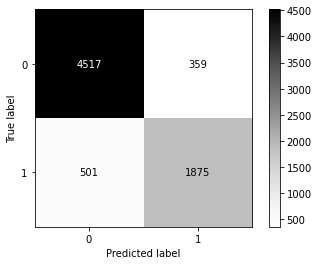

In [ ]:
rfc.fit(X_train, y_train)

lr_train = rfc.predict(X_train)
lr_test = rfc.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Greys'))

### Adaboost 

Adaboost (Adaptive Boosting) is an ensemble algorithm that is useful for both classification and regression problems. It combines multiple weak models to create a strong model. It works by giving more weight to the misclassified instances in order to improve the performance of the model. Adaboost is simple to implement and efficient, but it is sensitive to noise and outliers in the data.

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     19503
           1       0.75      0.66      0.70      9505

    accuracy                           0.82     29008
   macro avg       0.80      0.78      0.79     29008
weighted avg       0.81      0.82      0.81     29008

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4876
           1       0.75      0.66      0.70      2376

    accuracy                           0.82      7252
   macro avg       0.79      0.78      0.78      7252
weighted avg       0.81      0.82      0.81      7252

Confusion Matrix      : 


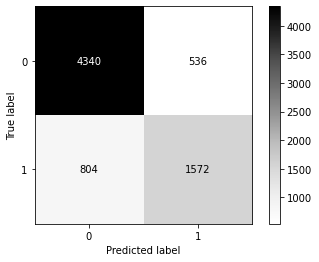

In [ ]:
adb.fit(X_train, y_train)

lr_train = adb.predict(X_train)
lr_test = adb.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, X_test, y_test, cmap='Greys'))

### SVM

Support Vector Machines (SVMs) are a type of supervised learning algorithm that is useful for both classification and regression problems. SVM finds the best boundary between different classes by maximizing the margin between the classes. It works well for high-dimensional and non-linearly separable datasets. However, it can be computationally expensive and time-consuming.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     19503
           1       0.78      0.63      0.70      9505

    accuracy                           0.82     29008
   macro avg       0.81      0.77      0.78     29008
weighted avg       0.82      0.82      0.81     29008

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4876
           1       0.78      0.62      0.69      2376

    accuracy                           0.82      7252
   macro avg       0.81      0.77      0.78      7252
weighted avg       0.82      0.82      0.81      7252

Confusion Matrix      : 


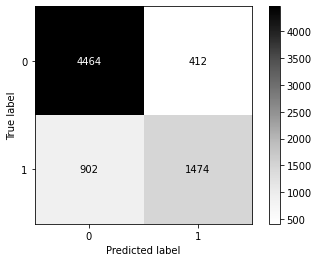

In [ ]:
svm.fit(X_train, y_train)

lr_train = svm.predict(X_train)
lr_test = svm.predict(X_test)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Greys'))

### Cross Validation  

#### Logistic regression

In [ ]:
cv_logreg = cross_val_score(logreg,X_train, y_train, cv=3, scoring='accuracy')

print('Logistic Regression')
print('accuracy Score - All - Cross Validation  : ', cv_logreg)
print('accuracy Score - Mean - Cross Validation : ', cv_logreg.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logreg.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logreg.mean()-cv_logreg.std()) , '-', (cv_logreg.mean()+cv_logreg.std()))

Logistic Regression
accuracy Score - All - Cross Validation  :  [0.80868666 0.79853139 0.80515048]
accuracy Score - Mean - Cross Validation :  0.8041228432219888
accuracy Score - Std - Cross Validation  :  0.0042090704174462005
accuracy Score - Range of Test-Set       :  0.7999137728045426 - 0.808331913639435


#### Decission Tree

In [ ]:
cv_dtc = cross_val_score(dtc,X_train, y_train, cv=3, scoring='accuracy')

print('Deciccion Tree')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

Deciccion Tree
accuracy Score - All - Cross Validation  :  [0.85346432 0.85241493 0.84910539]
accuracy Score - Mean - Cross Validation :  0.8516615484426984
accuracy Score - Std - Cross Validation  :  0.0018575556984720572
accuracy Score - Range of Test-Set       :  0.8498039927442264 - 0.8535191041411704


#### Random Forest

In [ ]:
cv_rfc = cross_val_score(rfc,X_train, y_train, cv=3, scoring='accuracy')

print('Random Forest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

Random Forest
accuracy Score - All - Cross Validation  :  [0.88148914 0.87982211 0.8833385 ]
accuracy Score - Mean - Cross Validation :  0.8815499193594071
accuracy Score - Std - Cross Validation  :  0.0014362044110586252
accuracy Score - Range of Test-Set       :  0.8801137149483484 - 0.8829861237704657


#### Adaboost

In [ ]:
cv_adb = cross_val_score(adb,X_train, y_train, cv=3, scoring='accuracy')

print('AdaBoost')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoost
accuracy Score - All - Cross Validation  :  [0.81726991 0.81332092 0.8149757 ]
accuracy Score - Mean - Cross Validation :  0.8151888416621184
accuracy Score - Std - Cross Validation  :  0.00161919586859595
accuracy Score - Range of Test-Set       :  0.8135696457935224 - 0.8168080375307143


#### SVM 

In [ ]:
cv_svm = cross_val_score(svm,X_train, y_train, cv=3, scoring='accuracy')

print('SVM')
print('accuracy Score - All - Cross Validation  : ', cv_svm)
print('accuracy Score - Mean - Cross Validation : ', cv_svm.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_svm.std())
print('accuracy Score - Range of Test-Set       : ', (cv_svm.mean()-cv_svm.std()) , '-', (cv_svm.mean()+cv_svm.std()))

SVM
accuracy Score - All - Cross Validation  :  [0.82481903 0.81176957 0.81725101]
accuracy Score - Mean - Cross Validation :  0.8179465363868058
accuracy Score - Std - Cross Validation  :  0.005350070949541483
accuracy Score - Range of Test-Set       :  0.8125964654372644 - 0.8232966073363472


#### Best Model 

In [ ]:
crossval = [cv_logreg,cv_dtc,cv_rfc,cv_adb,cv_svm]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression','Decission Tree','Random Forest','AdaBoost','SVM']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Random Forest,0.882,0.001
1,Decission Tree,0.852,0.002
2,SVM,0.818,0.005
3,AdaBoost,0.815,0.002
4,Logistic Regression,0.804,0.004


We have the best model which is Random Forest which have a highest Mean and the lowest Std value. Next we will do hyperparameter tuning. 

### Hyperparameter Tuning using GridSearchCV

In [ ]:
params = [
    {'n_estimators': [10, 20, 40, 60],        
     'max_features': [2, 3, 5, 1],            
     'max_depth': [5, 10, None],           
     'criterion': ['gini', 'entropy'],
     'class_weight' : ['balanced_subsample']}      
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'class_weight': ['balanced_subsample'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='recall')

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 2,
 'n_estimators': 10}

In [ ]:
grid_search.best_score_

0.8016833245660179

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     19503
           1       0.74      0.82      0.78      9505

    accuracy                           0.85     29008
   macro avg       0.82      0.84      0.83     29008
weighted avg       0.85      0.85      0.85     29008

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4876
           1       0.74      0.81      0.77      2376

    accuracy                           0.85      7252
   macro avg       0.82      0.84      0.83      7252
weighted avg       0.85      0.85      0.85      7252

Confusion Matrix      : 


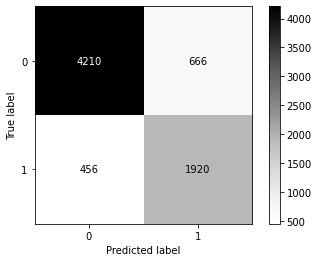

In [ ]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greys'))

## Process All through Pipeline 

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 3) Processing cat_ord, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing cat_ohe, total=   0.0s
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4876
           1       0.74      0.81      0.77      2376

    accuracy                           0.85      7252
   macro avg       0.82      0.84      0.83      7252
weighted avg       0.85      0.85      0.85      7252



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


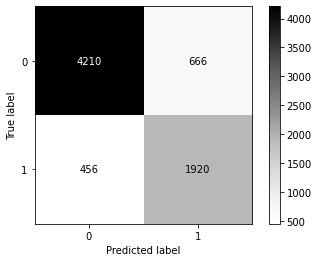

In [ ]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", model)
])

all_process.fit(x_train[['lead_time','no_of_special_requests','avg_price_per_room','no_of_week_nights','no_of_adults','no_of_weekend_nights','no_of_previous_bookings_not_canceled','market_segment_type','repeated_guest','required_car_parking_space','arrival_year']], y_train)
hasil = all_process.predict(x_test)

print(classification_report(y_test, hasil))
plot_confusion_matrix(all_process, x_test, y_test,cmap='Greys')

From the result we can conslude that Random Forest has a pretty good result,We use recall result because recall is a measure of the proportion of actual positive cases that are correctly identified by a model. It is important in problems where false negatives are costly, problems such as fraud detection or intrusion detection, imbalanced datasets, and to get a more comprehensive view of the model's performance. if we look in recall result the test perform 0.86 for predicting 0 and 0.81 for predicting 1. And the false negative result number is 456. 

## Model Saving

In [ ]:
pickle.dump(all_process, open('models.pkl','wb'))



## Model Inference

In [ ]:
data_inf

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,0
1,2,0,0,3,Meal Plan 1,0,Room_Type 1,22,2018,3,3,Online,0,0,0,94.33,2,0
2,2,0,1,2,Meal Plan 1,0,Room_Type 1,190,2018,11,14,Online,0,0,0,81.90,1,0
3,2,0,0,1,Meal Plan 1,0,Room_Type 1,2,2018,10,25,Online,0,0,0,140.00,0,0
4,2,0,4,6,Meal Plan 1,0,Room_Type 1,33,2018,3,5,Online,0,0,0,64.46,1,0
5,2,0,0,4,Meal Plan 1,0,Room_Type 4,274,2018,10,19,Online,0,0,0,99.45,1,1
6,2,0,1,2,Meal Plan 1,0,Room_Type 1,39,2017,10,23,Online,0,0,0,74.88,1,0
7,2,0,1,2,Meal Plan 1,0,Room_Type 1,191,2018,6,3,Offline,0,0,0,132.00,0,1
8,2,0,0,4,Meal Plan 1,0,Room_Type 1,12,2017,11,10,Online,0,0,0,95.00,0,0
9,2,0,0,1,Not Selected,0,Room_Type 1,65,2018,10,28,Online,0,0,0,80.10,2,0


In [ ]:
X_inf = data_inf.drop('booking_status',axis=1).copy()

In [ ]:
hasil_inf = all_process.predict(X_inf)
hasil_inf

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
hasil_inff = pd.DataFrame(hasil_inf, columns=['hasil prediksi'])
hasil_inff.head()

,hasil prediksi
0,0
1,0
2,1
3,1
4,0


In [ ]:
hasil_inff['Real Data'] = data_inf['booking_status']
hasil_inff

,hasil prediksi,Real Data
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


From the inference result we can get that the model perform his best job, the error result is only 3 from 14 total. 

In [ ]:
pickle.load(open("models.pkl", "rb"))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['avg_price_per_room'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['avg_price_per_room',
                                                   'lead_time',
                                                   'no_of_special_requests',
                                                   'no_of_week_nights',
                                                   'no_of_adults',
                                                   'no_of_weekend_nights',
                                                   'no_of_previous_bookings_not_c...
                                                  ['required_car_parking_space',
                                                   'arrival_year',
                                                   'repeated_guest']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['market_segment_type'])],
                                   verbose=True)),
                ('classification',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=10,
                                        max_features=2, n_estimators=10,
                                        random_state=0))])

How if we create new data ,

In [ ]:
inference = {
    'no_of_adults':2, 
    'no_of_children':2, 
    'no_of_weekend_nights':3,
    'no_of_week_nights':1,
    'type_of_meal_plan':"Meal Plan 1",
    'required_car_parking_space': 1,
    'room_type_reserved':"Room_Type 1",
    'lead_time':40,
    'arrival_year': 2018,
    'arrival_month': 12,
    'arrival_date': 20,
    'market_segment_type':"Online",
    'repeated_guest':1,
    'no_of_previous_cancellations': 0,
    'no_of_previous_bookings_not_canceled':0,
    'avg_price_per_room':230,
    'no_of_special_requests':0
 }

inferences = pd.DataFrame([inference])
inferences

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,2,3,1,Meal Plan 1,1,Room_Type 1,40,2018,12,20,Online,1,0,0,230,0


In [ ]:
pred = all_process.predict(inferences).tolist()[0]
pred

0

In [ ]:
if pred == 1:
    print('Canceled')
else:
    print('Not_Canceled')

Not_Canceled


## Conclusion 

- In summary, each algorithm has its own strengths and weaknesses and the best algorithm to use will depend on the specific problem and the dataset. Logistic Regression is simple and interpretable, Decision Trees are simple and interpretable but prone to overfitting, Random Forest is more accurate and less prone to overfitting than single Decision Trees, SVMs are good for high-dimensional and non-linearly separable datasets but computationally expensive, Adaboost is simple to implement and efficient but sensitive to noise and outliers.
The best model based on Cross Validation is Random Forest . The model is pretty good to predict the hotel reservation. 
- The obstacles from this project is we don't do handling imbalance dataset so the result is not yet maximum. 
- In the future we can do handling imbalance and do some hyperparameter tuning more deeply and try to use another model. 

